### Assignment 2 Question 4

#### Loading liberary and dataset

In [1]:
library(boot)
library(ggplot2)

#### (a) Generate a simulated data set

In [2]:
set.seed(1)
y=rnorm(100)
x=rnorm(100)
y=x-2*x^2+rnorm(100)

In [3]:
dataset=data.frame(x,y)

#### (b) Create a scatterplot of X against Y. Comment on what you find.

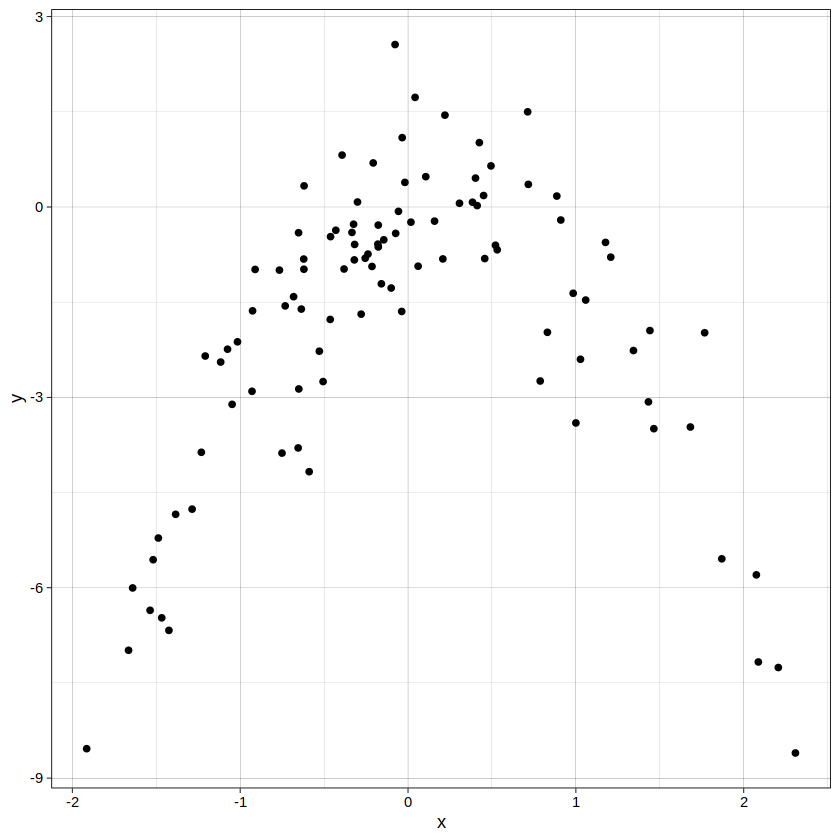

In [4]:
ggplot(dataset,aes(x=x,y=y))+ 
    geom_point()+
    theme_linedraw()

#### (c) Set a random seed, and then compute the LOOCV errors

In [5]:
set.seed(1)
cv.mse=data.frame()

In [6]:
for (i in 1:4) {
    glm.fit=glm(y~poly(x,i))
    glm.mse=cv.glm(dataset,glm.fit)$delta
    cv.mse<-rbind(cv.mse,data.frame(avgMse=glm.mse[1],adjMse=glm.mse[2]))
}

In [7]:
cv.mse

avgMse,adjMse
<dbl>,<dbl>
5.890979,5.888812
1.086596,1.086326
1.102585,1.102227
1.114772,1.114334


#### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [8]:
set.seed(2)
cv.mse=data.frame()

In [9]:
for (i in 1:4) {
    glm.fit=glm(y~poly(x,i))
    glm.mse=cv.glm(dataset,glm.fit)$delta
    cv.mse<-rbind(cv.mse,data.frame(avgMse=glm.mse[1],adjMse=glm.mse[2]))
}

In [10]:
cv.mse

avgMse,adjMse
<dbl>,<dbl>
5.890979,5.888812
1.086596,1.086326
1.102585,1.102227
1.114772,1.114334


#### (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

In [11]:
which.min(cv.mse$avgMse)
which.min(cv.mse$adjMse)

[1] 2

[1] 2

#### (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [12]:
summary(glm(y~poly(x,4)))


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8914  -0.5244   0.0749   0.5932   2.7796  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.1041 -17.549   <2e-16 ***
poly(x, 4)1   2.3164     1.0415   2.224   0.0285 *  
poly(x, 4)2 -21.0586     1.0415 -20.220   <2e-16 ***
poly(x, 4)3  -0.3048     1.0415  -0.293   0.7704    
poly(x, 4)4  -0.4926     1.0415  -0.473   0.6373    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1.084654)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 103.04  on 95  degrees of freedom
AIC: 298.78

Number of Fisher Scoring iterations: 2
